In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')

In [97]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [98]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [99]:
submission = pd.DataFrame()
submission['Id'] = test['Id']

In [100]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [101]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [102]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [103]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

zztest

In [104]:
def func_accuracy(algorithm, x_train, y_train, vc):
    model = algorithm.fit(x_train, y_train)
    accuracy = round(model.score(x_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algorithm, x_train, y_train, cv = vc, n_jobs = 1)
    accuracy_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return accuracy, accuracy_vc

Text(0, 0.5, 'SalePrice')

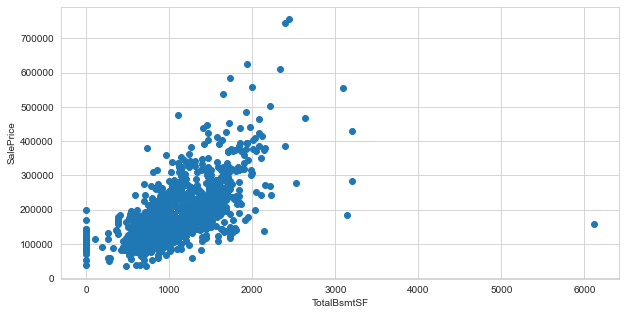

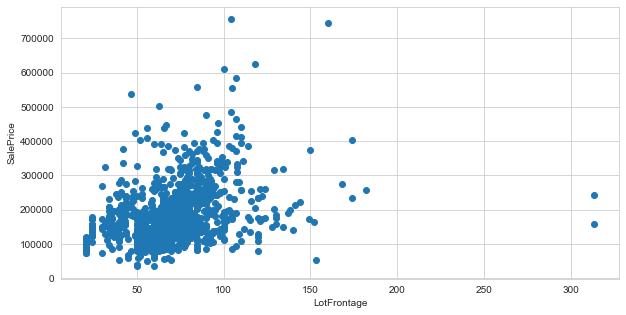

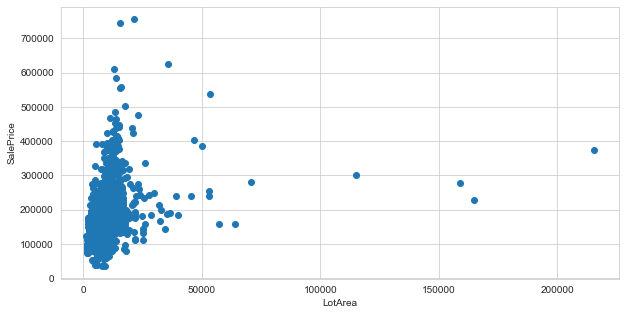

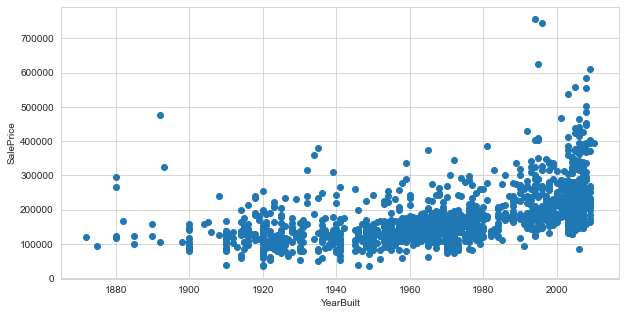

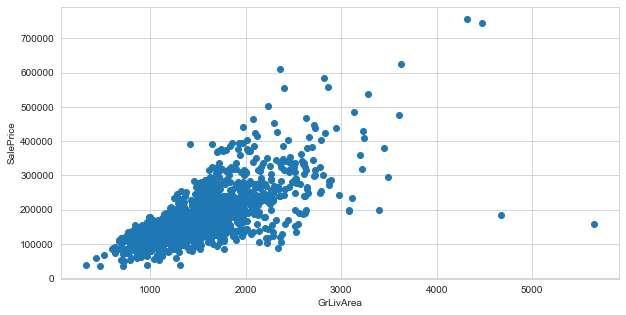

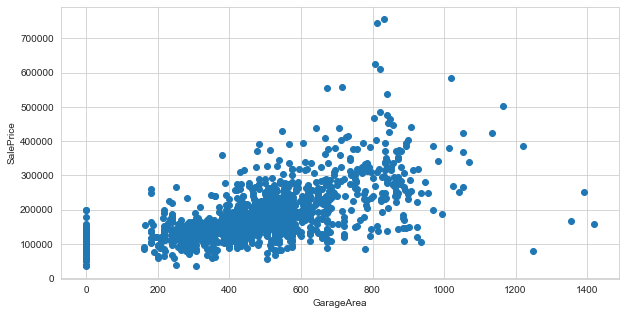

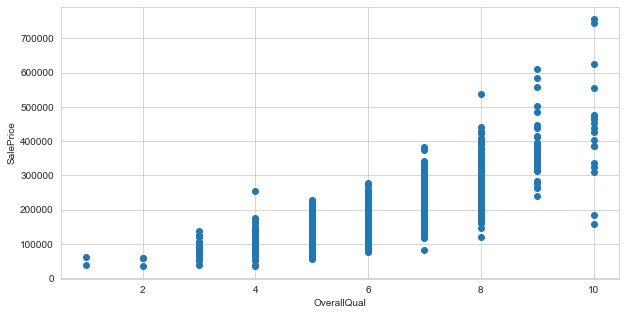

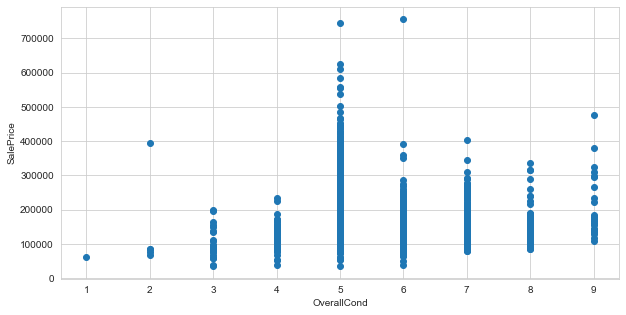

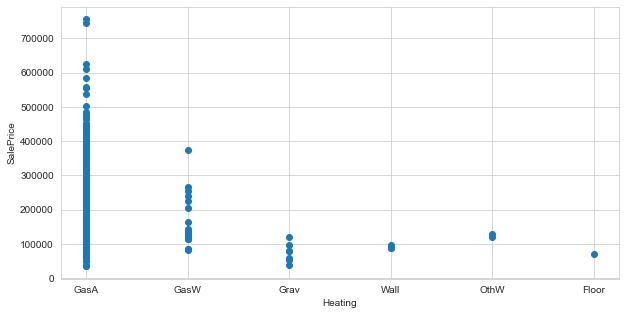

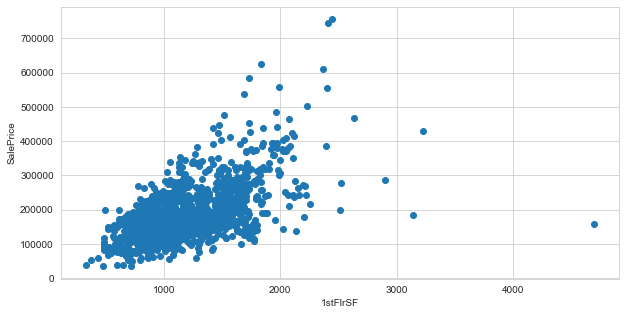

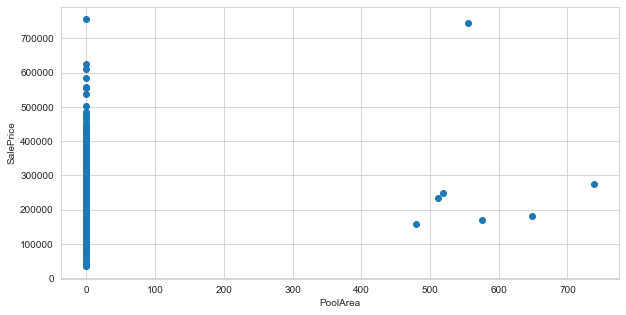

In [105]:
data = pd.concat([train["TotalBsmtSF"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

data = pd.concat([train["LotFrontage"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["LotFrontage"],train["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")


data = pd.concat([train["LotArea"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["LotArea"],train["SalePrice"])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")

data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["YearBuilt"],train["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

data = pd.concat([train["GrLivArea"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

data = pd.concat([train["GarageArea"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["GarageArea"],train["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

data = pd.concat([train["OverallQual"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["OverallQual"],train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

data = pd.concat([train["OverallCond"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["OverallCond"],train["SalePrice"])
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")

data = pd.concat([train["Heating"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["Heating"],train["SalePrice"])
plt.xlabel("Heating")
plt.ylabel("SalePrice")

data = pd.concat([train["1stFlrSF"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["1stFlrSF"],train["SalePrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")

data = pd.concat([train["PoolArea"],train["SalePrice"]],axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(train["PoolArea"],train["SalePrice"])
plt.xlabel("PoolArea")
plt.ylabel("SalePrice")

C:\Users\augus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

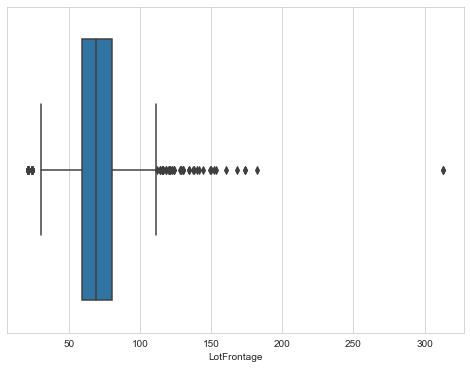

In [106]:
fig = plt.figure(figsize=(18, 6))
ax=fig.add_subplot(1,2,1)
sns.boxplot(train["LotFrontage"])

In [107]:
train = train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['LotFrontage']>150) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['LotArea']>50000) & (train['SalePrice']<500000)].index)
train = train.drop(train[(train['YearBuilt']<1910) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['1stFlrSF']<2000) & (train['SalePrice']<400000)].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<350000)].index)
train = train.drop(train[(train['GarageArea']>10000) & (train['SalePrice']<400000)].index)

In [108]:
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(abs(train['TotalBsmtSF'].mean()))
train['LotFrontage'] = train['LotFrontage'].fillna(abs(train['LotFrontage'].mean()))
train['GarageArea'] = train['GarageArea'].fillna(abs(train['GarageArea'].mean()))

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 58 to 1456
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             54 non-null     int64  
 1   MSSubClass     54 non-null     int64  
 2   MSZoning       54 non-null     object 
 3   LotFrontage    54 non-null     float64
 4   LotArea        54 non-null     int64  
 5   Street         54 non-null     object 
 6   Alley          0 non-null      object 
 7   LotShape       54 non-null     object 
 8   LandContour    54 non-null     object 
 9   Utilities      54 non-null     object 
 10  LotConfig      54 non-null     object 
 11  LandSlope      54 non-null     object 
 12  Neighborhood   54 non-null     object 
 13  Condition1     54 non-null     object 
 14  Condition2     54 non-null     object 
 15  BldgType       54 non-null     object 
 16  HouseStyle     54 non-null     object 
 17  OverallQual    54 non-null     int64  
 18  OverallCo

In [110]:
y = train.SalePrice
x_columns = ['TotalBsmtSF',  'LotArea', '1stFlrSF', 'GrLivArea','GarageArea']
x = train[x_columns]
test = test[x_columns]

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [112]:
for col in test.columns:
    df_nan = test[test[col].isin([np.nan, np.inf, -np.inf])]
    if df_nan.shape[0] != 0:
        print(col)
test = test.fillna(test.mean())

TotalBsmtSF
GarageArea


In [113]:
# RandomForestRegressor
model = RandomForestRegressor(oob_score = True)
model.fit(x_train,y_train)
print(model.oob_score_)

0.6740023406941238


In [114]:
test_pred = model.predict(test)
submission['SalePrice'] = test_pred
submission.to_csv('submission_v2.csv', index=False)

In [115]:
submission.head()

,Id,SalePrice
0,1461,380468.56
1,1462,209797.36
2,1463,207500.64
3,1464,189770.96
4,1465,191537.96
